<a href="https://colab.research.google.com/github/PrzKem/Keras/blob/DeepLearning/Chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Przygotowanie środowiska**

In [1]:
!pip install numpy scipy matplotlib ipython keras sympy nose h5py graphviz

     |████████████████████████████████| 154 kB 5.6 MB/s 


**Klasyfikacja danych binarnych**<br/>
Import danych zawierających recenzje filmów

In [3]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data[0][0])
print(train_labels[0])

17473536/17464789 [==============================] - 0s 0us/step
1
1


Przekształcenie danych wejściowych na wektor

Ręczna implementacja funkcji przekształcającej 

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

Wykonanie funkcji na wektorach

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Przygotowanie sieci

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Przygotowanie danych do użycia

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Trening modelu

In [23]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 2s 48ms/step - loss: 3.0049e-08 - acc: 1.0000 - val_loss: 3.9111 - val_acc: 0.8621
Epoch 2/4
30/30 [==============================] - 1s 32ms/step - loss: 2.5237e-08 - acc: 1.0000 - val_loss: 3.9273 - val_acc: 0.8628
Epoch 3/4
30/30 [==============================] - 1s 31ms/step - loss: 2.1133e-08 - acc: 1.0000 - val_loss: 3.9533 - val_acc: 0.8629
Epoch 4/4
30/30 [==============================] - 1s 31ms/step - loss: 1.8169e-08 - acc: 1.0000 - val_loss: 3.9757 - val_acc: 0.8630


Wykres straty trenowania i walidacji

In [32]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()

plt.show()

KeyError: ignored

Wykres dokładności trenowania i walidacji

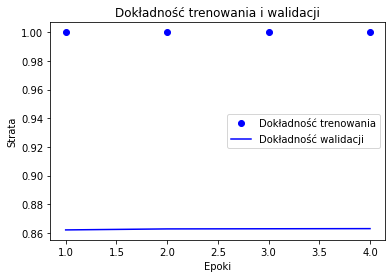

In [25]:
plt.clf() #czyszczenie rysunku

plt.plot(epochs, acc, 'bo', label = 'Dokładność trenowania')
plt.plot(epochs, val_acc, 'b', label = 'Dokładność walidacji')
plt.title('Dokładność trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()

plt.show()

Predykcja nowych wartości

In [26]:
model.predict(x_test)

array([[2.3491088e-08],
       [1.0000000e+00],
       [1.0000000e+00],
       ...,
       [1.7342630e-12],
       [7.8658241e-10],
       [8.5520749e-14]], dtype=float32)

**Klasyfikacja wieloklasowa**<br/>
Wczytanie danych

In [27]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


Przygotowanie danych

In [28]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i,label] = 1
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

Przygotowanie modelu

In [29]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Tworzenie zbioru kontrolnego

In [30]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Trenowanie modelu

In [40]:
history = model.fit(partial_x_train,
                     partial_y_train,
                     epochs = 9,
                     batch_size=512,
                     validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 47ms/step - loss: 0.0950 - accuracy: 0.9588 - val_loss: 1.1926 - val_accuracy: 0.7990
Epoch 2/9
16/16 [==============================] - 1s 45ms/step - loss: 0.0933 - accuracy: 0.9595 - val_loss: 1.1970 - val_accuracy: 0.8050
Epoch 3/9
16/16 [==============================] - 1s 48ms/step - loss: 0.0910 - accuracy: 0.9584 - val_loss: 1.2866 - val_accuracy: 0.7960
Epoch 4/9
16/16 [==============================] - 1s 47ms/step - loss: 0.0925 - accuracy: 0.9599 - val_loss: 1.2508 - val_accuracy: 0.7990
Epoch 5/9
16/16 [==============================] - 1s 46ms/step - loss: 0.0905 - accuracy: 0.9594 - val_loss: 1.2347 - val_accuracy: 0.8000
Epoch 6/9
16/16 [==============================] - 1s 45ms/step - loss: 0.0881 - accuracy: 0.9602 - val_loss: 1.3165 - val_accuracy: 0.7830
Epoch 7/9
16/16 [==============================] - 1s 46ms/step - loss: 0.0914 - accuracy: 0.9579 - val_loss: 1.3199 - val_accuracy: 0.7920
Epoch 8/9
16/16 [===

Wykresy przedstawiające wynik treningu

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


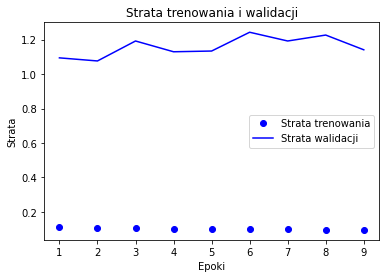

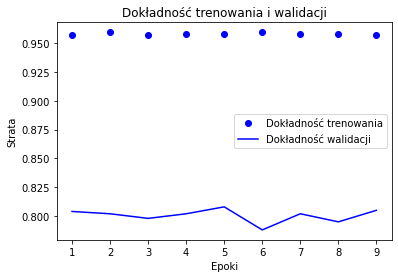

In [39]:
import matplotlib.pyplot as plt


history_dict = history.history
print(history_dict.keys())

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Dokładność trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokładność walidacji')
plt.title('Dokładność trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

Przewidywania na podstawie otrzymanego modelu

In [41]:
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.argmax(predictions[0]))

(46,)
3


**Regresja**</br>Przygotowanie zbioru

In [44]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


Normalizacja danych

In [45]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

Definicja modelu

In [46]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',
                         input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

Walidacja k-składowych

In [48]:
import numpy as np

k=4
num_val_samples = len(train_data) // 4
num_epochs = 80
all_scores = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples],
       train_data[(i+1)*num_val_samples:]],
       axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
       axis=0)
  
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs = num_epochs, batch_size=16, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

print(all_scores)
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
[2.0068438053131104, 2.478224277496338, 2.432537317276001, 2.5792362689971924]
2.3742104172706604
